<a href="https://colab.research.google.com/github/cdmafAdi/DL_NOTES-/blob/main/chp_1_Neural_network_intro%20/30_non_zero_wt_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# non zero weight initialization**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("x,y,class.csv")
df.head()

,x1,x2,label
0,0.0,0.0,0
1,0.5,0.5,0
2,1.0,0.0,0
3,1.5,0.5,0
4,2.0,0.0,0


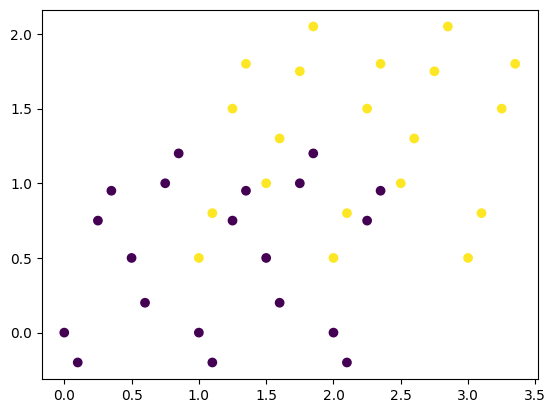

In [39]:
plt.scatter(df['x1'],df['x2'],c = df['label'])


In [40]:
x = df.iloc[:,0:2].values
y = df.iloc[:, -1].values

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Dense(2, activation = 'sigmoid', input_dim=2))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.get_weights()

[array([[ 0.06212986, -0.12797952],
        [-0.26582396,  1.1742102 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.25927937],
        [0.1501342 ]], dtype=float32),
 array([0.], dtype=float32)]

In [44]:
initial_weights = model.get_weights()



In [45]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [46]:
model.set_weights(initial_weights)

In [47]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [48]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(x,y,epochs = 100, validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step - accuracy: 0.3750 - loss: 1.0396 - val_accuracy: 1.0000 - val_loss: 0.2171
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3750 - loss: 1.0384 - val_accuracy: 1.0000 - val_loss: 0.2178
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3750 - loss: 1.0372 - val_accuracy: 1.0000 - val_loss: 0.2184
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3750 - loss: 1.0360 - val_accuracy: 1.0000 - val_loss: 0.2190
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3750 - loss: 1.0348 - val_accuracy: 1.0000 - val_loss: 0.2196
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3750 - loss: 1.0336 - val_accuracy: 1.0000 - val_loss: 0.2203
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3750 - loss: 1.0324 - val_accuracy: 1.0000 - val_loss: 0.2209
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3750 - loss: 1.0311 - val_accuracy: 1.0000 - val_loss

In [50]:
import mlxtend

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 639us/step


<Axes: >

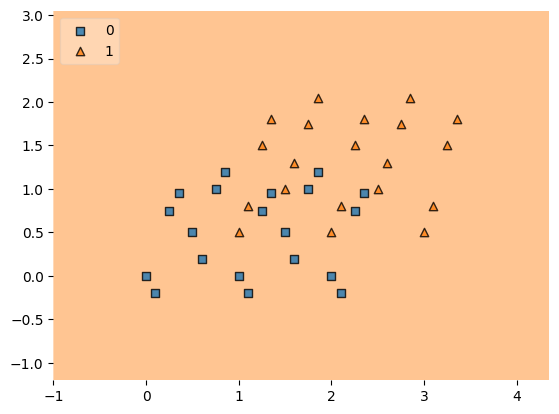

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x, y=y.astype(int), clf=model, legend=2)
